In [1]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
%%time

df_q1 = pd.read_csv('2017Q1-capitalbikeshare-tripdata.csv')
df_q2 = pd.read_csv('2017Q2-capitalbikeshare-tripdata.csv')
df_q3 = pd.read_csv('2017Q3-capitalbikeshare-tripdata.csv')
df_q4 = pd.read_csv('2017Q4-capitalbikeshare-tripdata.csv')

Wall time: 16.2 s


<h1>First Quarter Trips Analysis</h1>

In [3]:
df_q1.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [4]:
df_q1.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [5]:
df = df_q1.copy()

df['Start_date'] = df['Start date'].apply(lambda x: x.split(' ')[0])
df['End_date'] = df['End date'].apply(lambda x: x.split(' ')[0])

df1 = df[df['Start_date'] != df['End_date']]
print('So we can see that there are {} instances in which start date and end date are not same which is {} percent of total data.'.format(df1.shape[0],df1.shape[0]/df.shape[0]*100))

So we can see that there are 1714 instances in which start date and end date are not same which is 0.2651157754713771 percent of total data.


In [6]:
def preprocess_dates(df):
    sdt = []
    edt = []
    st = []
    et = []
    for i in tqdm(range(df.shape[0])):
        sd = df['Start date'].iloc[i]
        ed = df['End date'].iloc[i]
        ar1 = sd.split(' ')
        ar2 = ed.split(' ')
        sdt.append(ar1[0])
        edt.append(ar2[0])
        st.append(ar1[1])
        et.append(ar2[1])
    return sdt, edt, st, et
    
df_q1['Start_date'], df_q1['End_date'], df_q1['Start_time'], df_q1['End_time'] = preprocess_dates(df_q1)

100%|███████████████████████████████████████████████████████████████████████| 646510/646510 [00:25<00:00, 25615.60it/s]


In [7]:
df_q1 = df_q1.drop(['Start date', 'End date'],axis=1)

In [8]:
df_q1.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_date,End_date,Start_time,End_time
0,221,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,2017-01-01,2017-01-01,00:00:41,00:04:23
1,1676,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,2017-01-01,2017-01-01,00:06:53,00:34:49
2,1356,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,2017-01-01,2017-01-01,00:07:10,00:29:47
3,1327,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,2017-01-01,2017-01-01,00:07:22,00:29:30
4,1636,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,2017-01-01,2017-01-01,00:07:36,00:34:52


<h3> Let's Make some plots to get insights from the data </h3>

In [9]:
rides_by_dates = df_q1.groupby(['Start_date']).size().reset_index(name='count')
rides_by_dates.index = rides_by_dates.Start_date

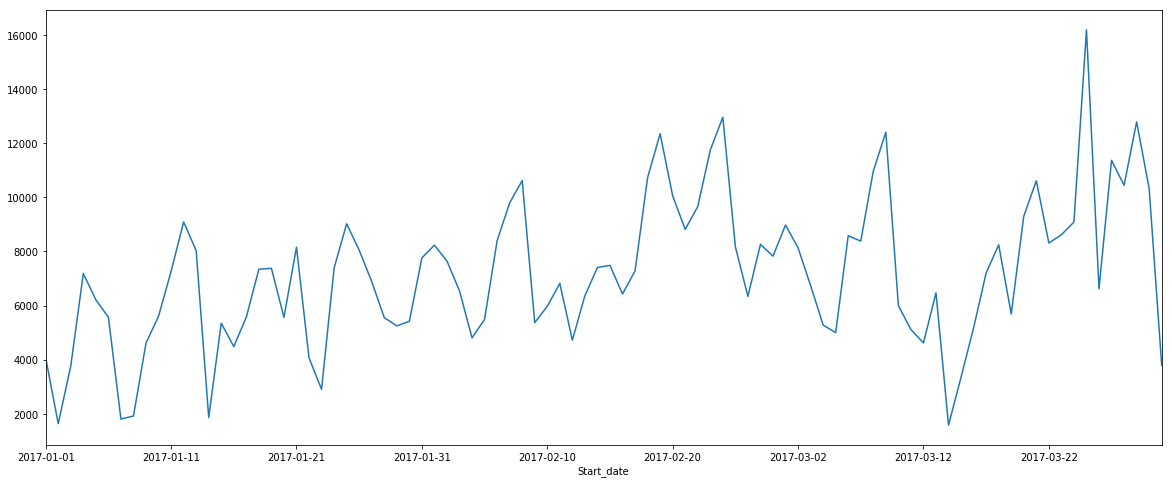

In [10]:
plt.figure(figsize=(20,8))
rides_by_dates['count'].plot()

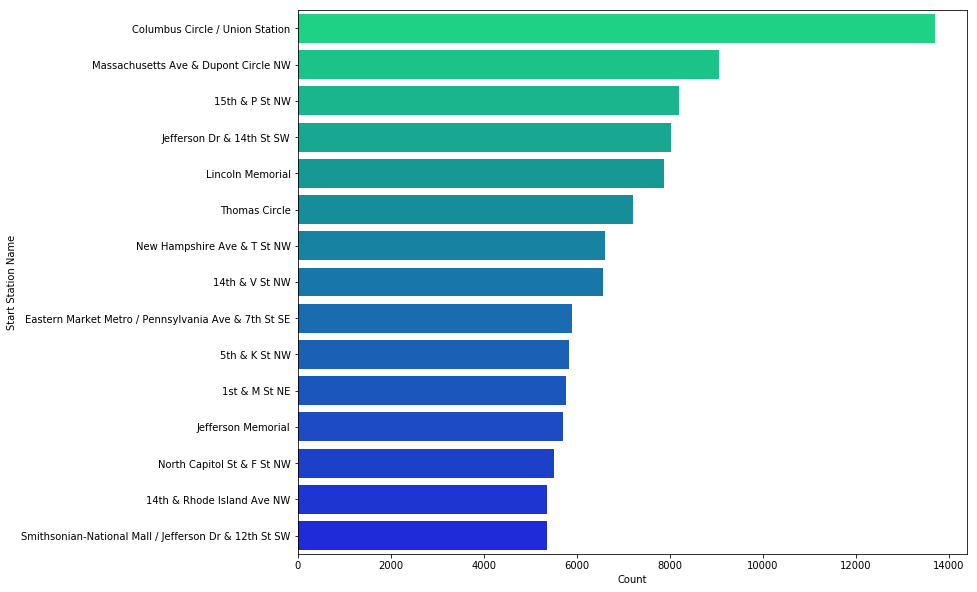

In [11]:
rides_by_start_station = df_q1['Start station'].value_counts()
df_data = {'Start Station Name': rides_by_start_station.index, 'Count': rides_by_start_station.values}
df_ridesbystart_station = pd.DataFrame(df_data).head(15)

plt.figure(figsize=(12,10))
sns.barplot(y = df_ridesbystart_station['Start Station Name'], x = df_ridesbystart_station['Count'], palette='winter_r')

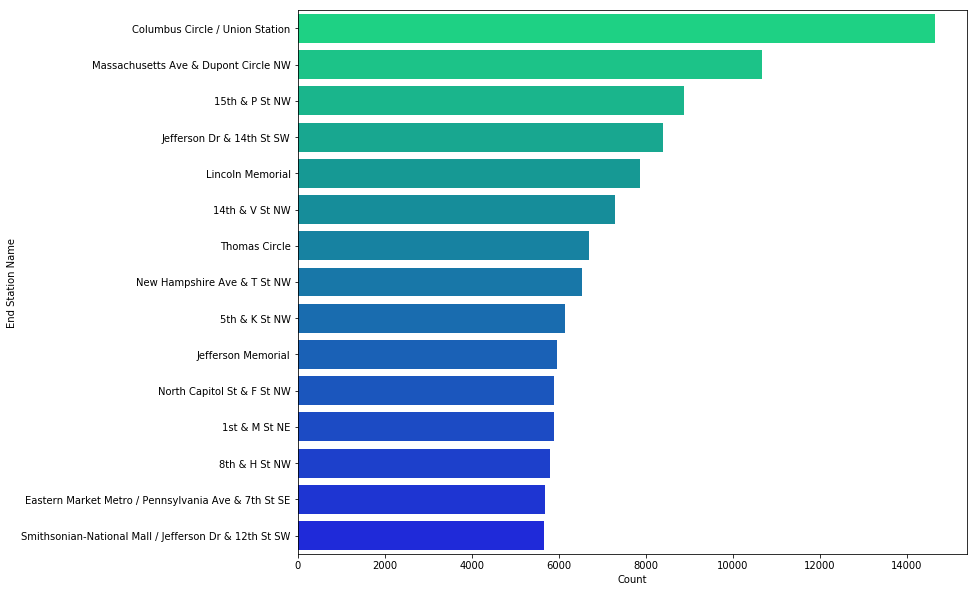

In [12]:
rides_by_end_station = df_q1['End station'].value_counts()
df_data = {'End Station Name': rides_by_end_station.index, 'Count': rides_by_end_station.values}
df_ridesbyend_station = pd.DataFrame(df_data).head(15)

plt.figure(figsize=(12,10))
sns.barplot(y = df_ridesbyend_station['End Station Name'], x = df_ridesbyend_station['Count'], palette='winter_r')

<h5> Here we can clearly see that the most visited places of the city. </h5>

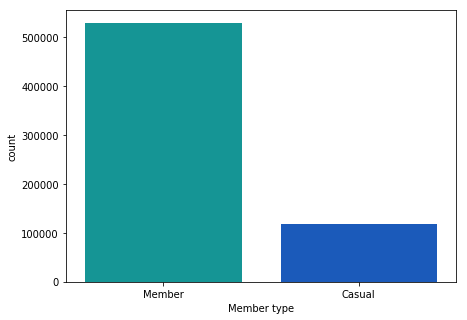

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_q1['Member type'], palette='winter_r')

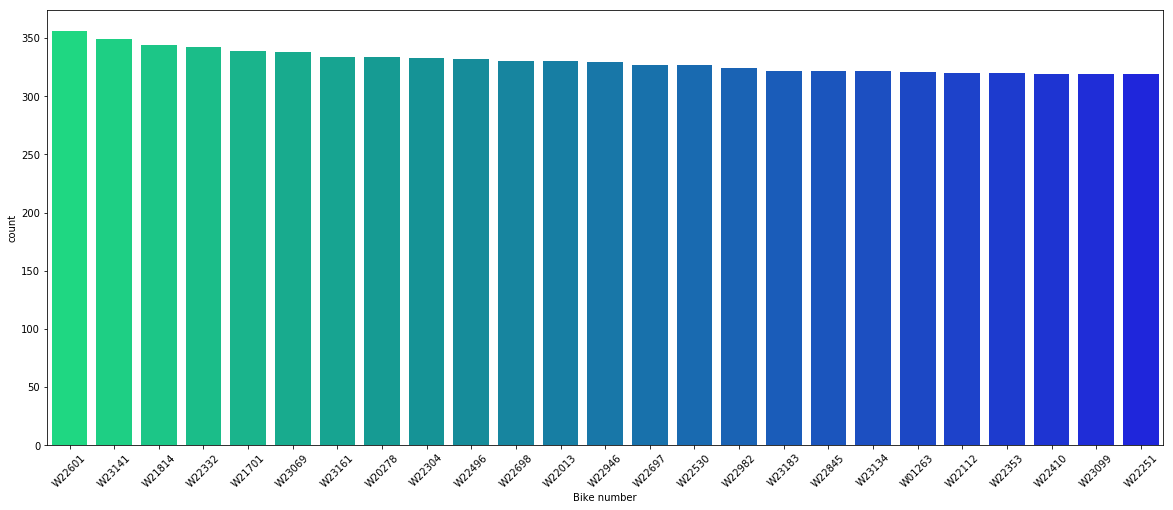

In [14]:
rides_by_bikes = df_q1.groupby(['Bike number']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_plot = rides_by_bikes.head(25)
plt.figure(figsize=(20, 8))
sns.barplot(x=df_plot['Bike number'], y=df_plot['count'], palette='winter_r')
plt.xticks(rotation = 45)
plt.show()

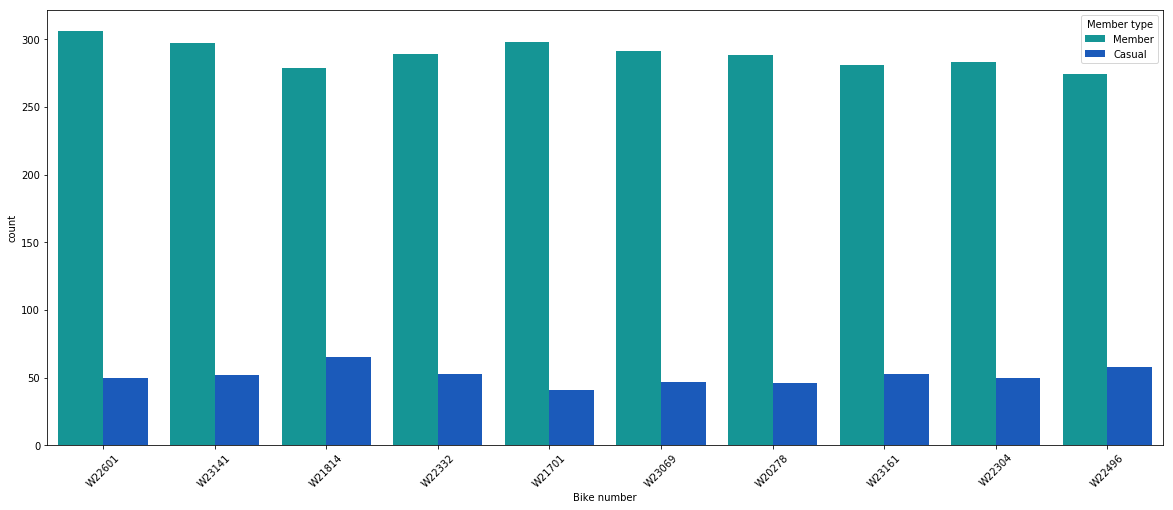

In [15]:
plt.figure(figsize=(20, 8))
sns.countplot(x=df_q1['Bike number'], hue=df_q1['Member type'], palette='winter_r', order=df_q1['Bike number'].value_counts().iloc[:10].index)
plt.xticks(rotation = 45)
plt.show()

<h4> We can clearly see that most of the people who book rides are "registered" member (Annual Member, 30-Day Member or Day Key Member) and  "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass) are less </h4>

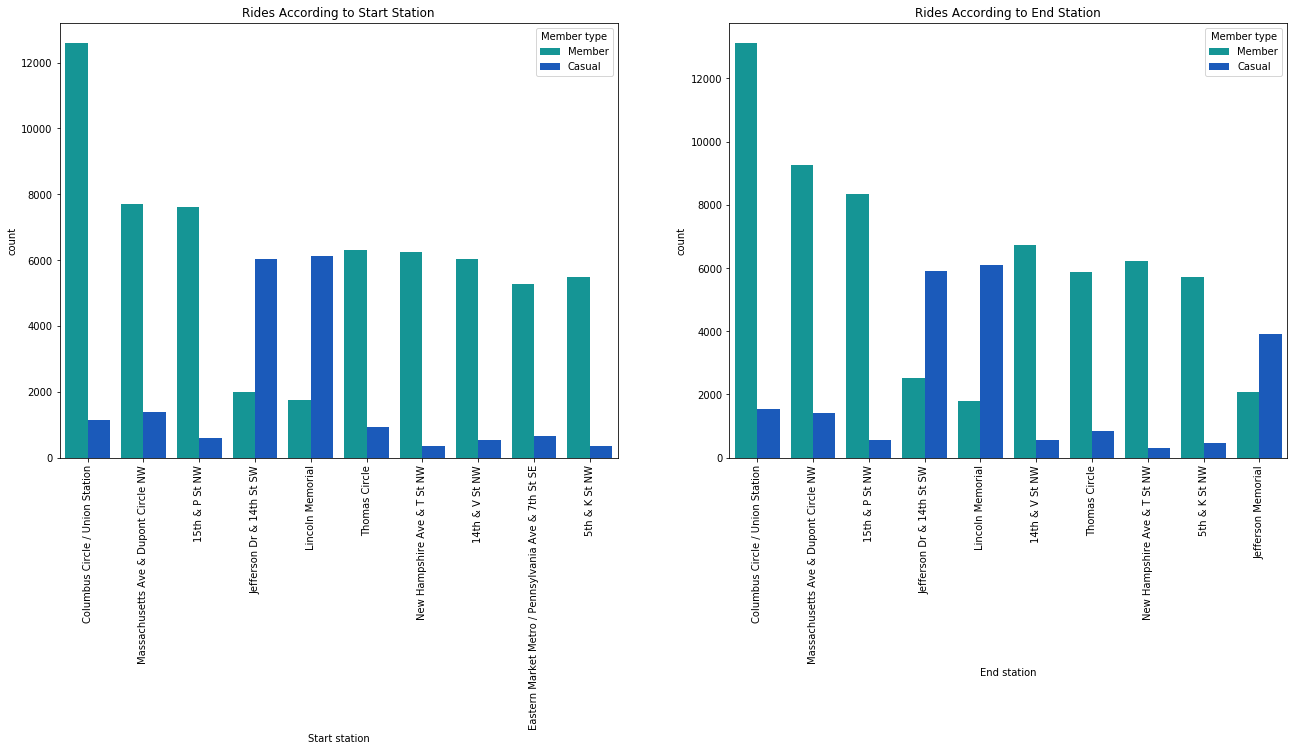

In [16]:
plt.figure(figsize=(22, 8))

plt.subplot(1,2,1)
sns.countplot(x=df_q1['Start station'], hue=df_q1['Member type'], palette='winter_r', order=df_q1['Start station'].value_counts().iloc[:10].index)
plt.title('Rides According to Start Station')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x=df_q1['End station'], hue=df_q1['Member type'], palette='winter_r', order=df_q1['End station'].value_counts().iloc[:10].index)
plt.title('Rides According to End Station')
plt.xticks(rotation = 90)

plt.show()

<h4> We can see that most of the users are "registered" members but interesting thing people who take rides or go to "Jefferson Dr and 14th St SW"  and "Lincoln Memorial" are "casual" riders. Also riders with end destination "Jefferson Memorial" have high no. of "casual" riders</h4>

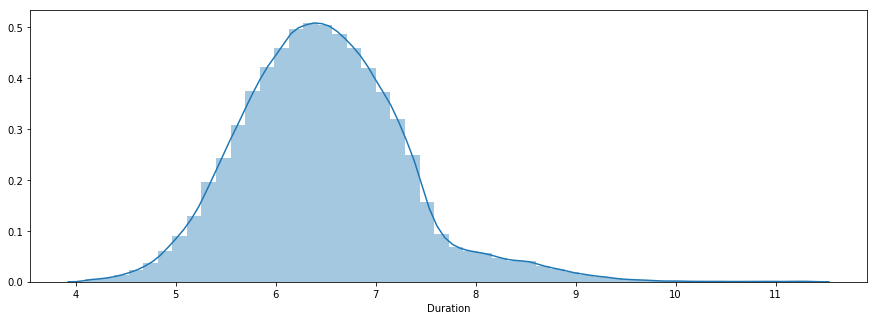

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(a = df_q1['Duration'].apply(np.log))

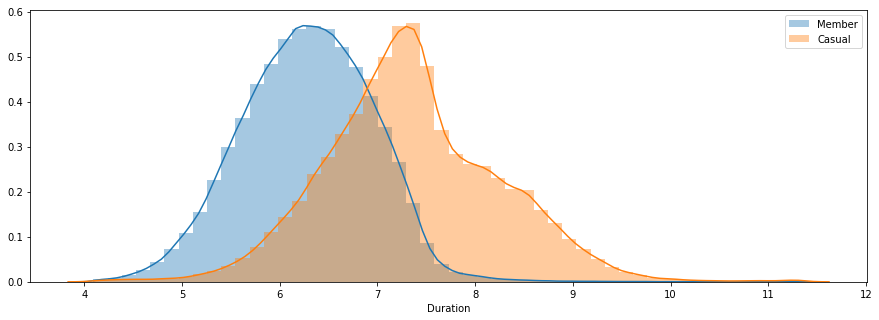

In [18]:
df1 = df_q1[df_q1['Member type'] == 'Member']
member_dur = df1['Duration'].apply(np.log)

df2 = df_q1[df_q1['Member type'] == 'Casual']
casual_dur = df2['Duration'].apply(np.log)

plt.figure(figsize=(15,5))
sns.distplot(a=member_dur, label='Member')
sns.distplot(a=casual_dur, label='Casual')
plt.legend()
plt.show()

<h1>Second Quarter Trips Analysis</h1>

In [19]:
df = df_q2.copy()

df['Start_date'] = df['Start date'].apply(lambda x: x.split(' ')[0])
df['End_date'] = df['End date'].apply(lambda x: x.split(' ')[0])

df1 = df[df['Start_date'] != df['End_date']]
print('So we can see that there are {} instances in which start date and end date are not same which is {} percent of total data.'.format(df1.shape[0],df1.shape[0]/df.shape[0]*100))

So we can see that there are 5077 instances in which start date and end date are not same which is 0.4596991356533487 percent of total data.


In [20]:
df_q2['Start_date'], df_q2['End_date'], df_q2['Start_time'], df_q2['End_time'] = preprocess_dates(df_q2)

100%|█████████████████████████████████████████████████████████████████████| 1104418/1104418 [00:45<00:00, 24428.53it/s]


In [21]:
df_q2 = df_q2.drop(['Start date', 'End date'],axis=1)

In [22]:
df_q2.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_date,End_date,Start_time,End_time
0,381,31238,14th & G St NW,31202,14th & R St NW,W22257,Member,2017-04-01,2017-04-01,00:00:22,00:06:43
1,590,31109,7th & T St NW,31278,18th & R St NW,W20006,Member,2017-04-01,2017-04-01,00:02:02,00:11:53
2,2938,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31238,14th & G St NW,W22225,Casual,2017-04-01,2017-04-01,00:02:32,00:51:30
3,380,31121,Calvert St & Woodley Pl NW,31104,Adams Mill & Columbia Rd NW,W20146,Member,2017-04-01,2017-04-01,00:03:02,00:09:23
4,423,31023,Fairfax Dr & Wilson Blvd,31034,N Randolph St & Fairfax Dr,W00316,Member,2017-04-01,2017-04-01,00:03:38,00:10:41


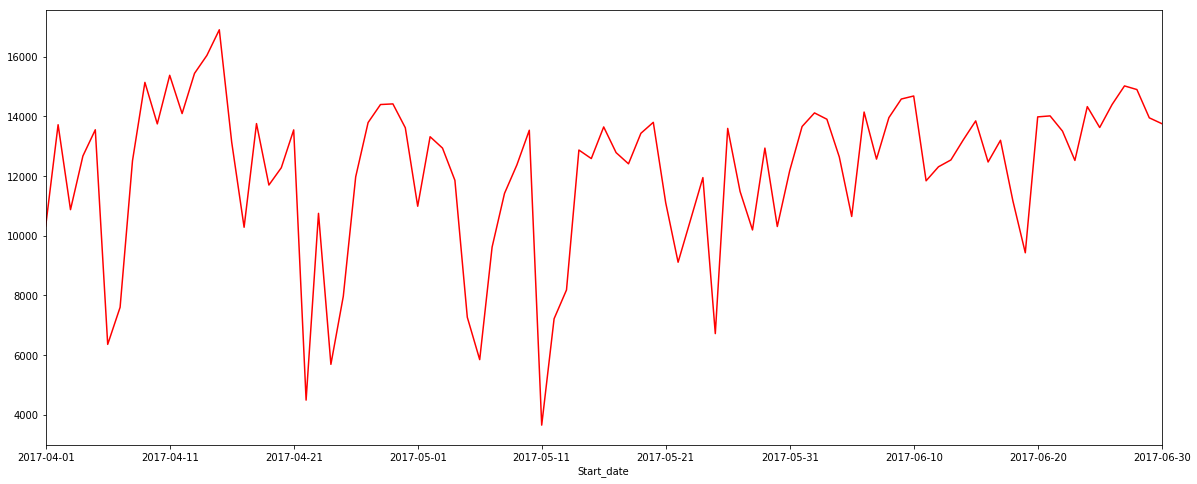

In [23]:
rides_by_dates = df_q2.groupby(['Start_date']).size().reset_index(name='count')
rides_by_dates.index = rides_by_dates.Start_date
plt.figure(figsize=(20,8))
rides_by_dates['count'].plot(color = 'red')

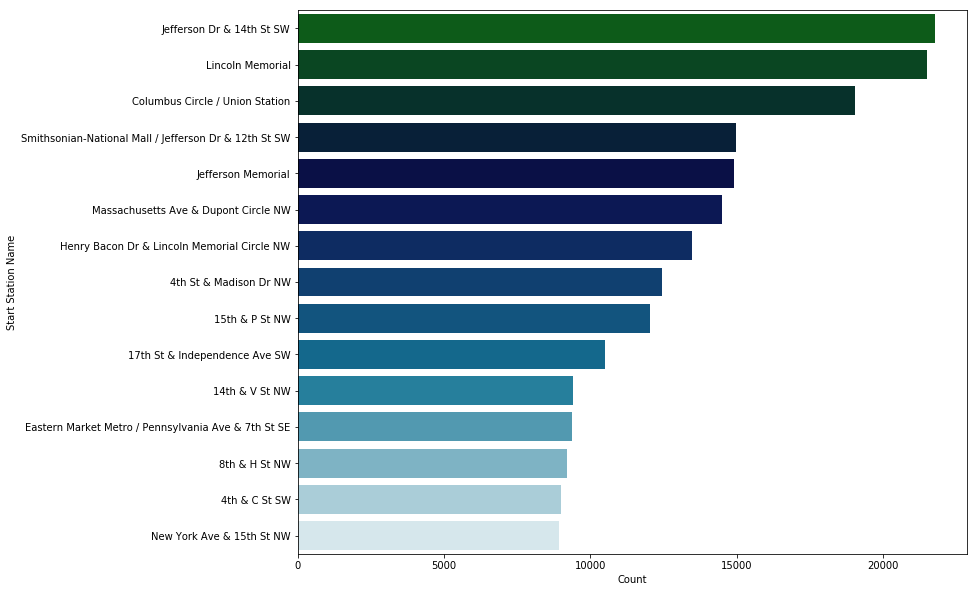

In [24]:
rides_by_start_station = df_q2['Start station'].value_counts()
df_data = {'Start Station Name': rides_by_start_station.index, 'Count': rides_by_start_station.values}
df_ridesbystart_station = pd.DataFrame(df_data).head(15)

plt.figure(figsize=(12,10))
sns.barplot(y = df_ridesbystart_station['Start Station Name'], x = df_ridesbystart_station['Count'], palette='ocean')

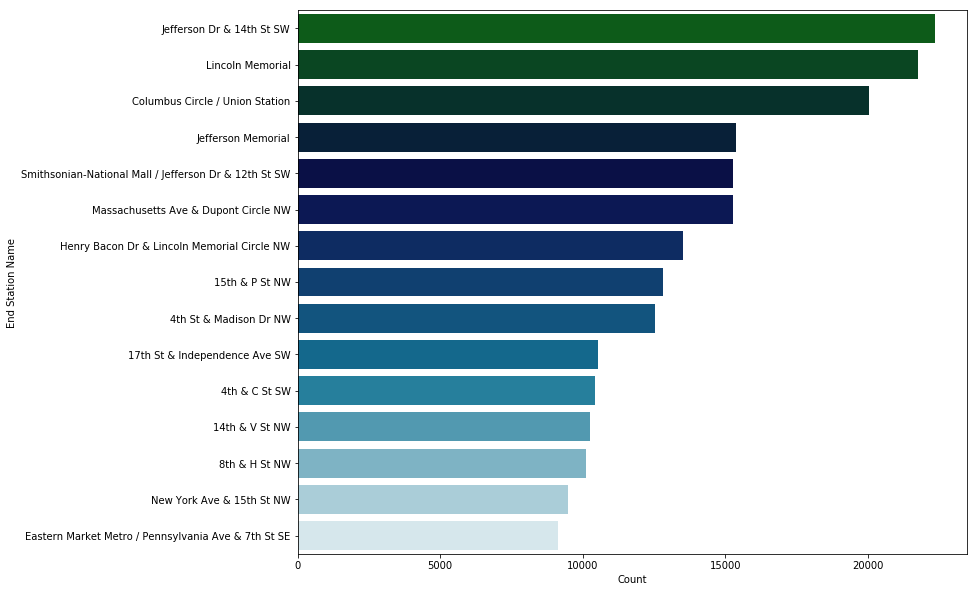

In [25]:
rides_by_end_station = df_q2['End station'].value_counts()
df_data = {'End Station Name': rides_by_end_station.index, 'Count': rides_by_end_station.values}
df_ridesbyend_station = pd.DataFrame(df_data).head(15)

plt.figure(figsize=(12,10))
sns.barplot(y = df_ridesbyend_station['End Station Name'], x = df_ridesbyend_station['Count'], palette='ocean')

<h5> We can see that "Columbus Circle/Union Station" is not the most visited place unlike quarter one. </h5>

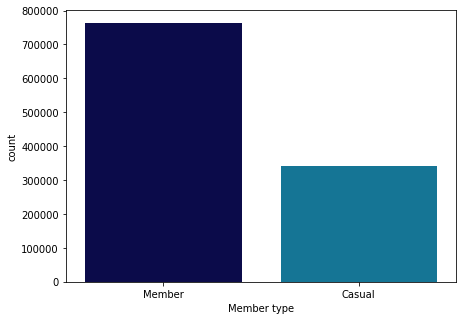

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_q2['Member type'], palette='ocean')

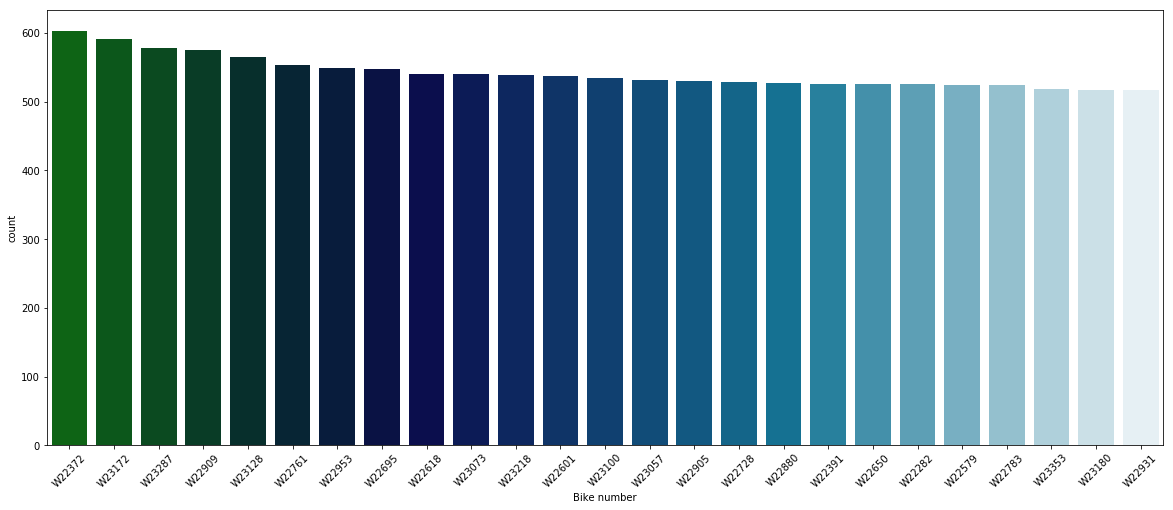

In [27]:
rides_by_bikes = df_q2.groupby(['Bike number']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_plot = rides_by_bikes.head(25)
plt.figure(figsize=(20, 8))
sns.barplot(x=df_plot['Bike number'], y=df_plot['count'], palette='ocean')
plt.xticks(rotation = 45)
plt.show()

<h5> We will not draw the Bike number with member plot because it will same as quarter 1. </h5>

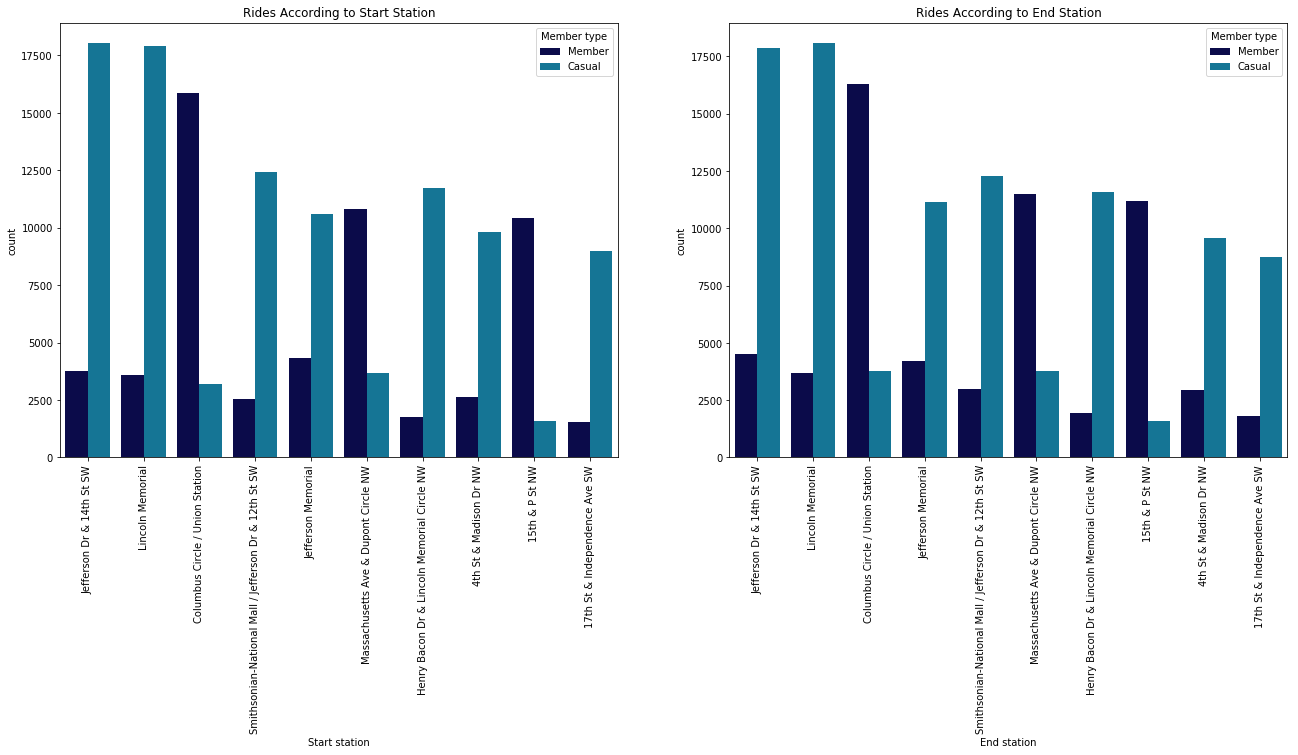

In [28]:
plt.figure(figsize=(22, 8))

plt.subplot(1,2,1)
sns.countplot(x=df_q2['Start station'], hue=df_q2['Member type'], palette='ocean', order=df_q2['Start station'].value_counts().iloc[:10].index)
plt.title('Rides According to Start Station')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x=df_q2['End station'], hue=df_q2['Member type'], palette='ocean', order=df_q2['End station'].value_counts().iloc[:10].index)
plt.title('Rides According to End Station')
plt.xticks(rotation = 90)

plt.show()

<h5> We can see which places has high no. of the Casual Riders </h5>

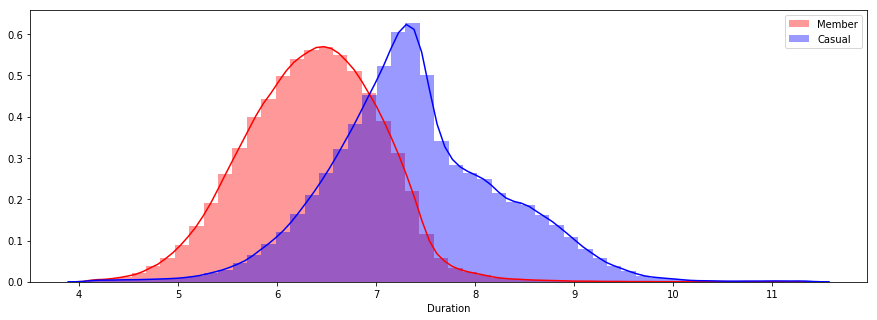

In [29]:
df1 = df_q2[df_q2['Member type'] == 'Member']
member_dur = df1['Duration'].apply(np.log)

df2 = df_q2[df_q2['Member type'] == 'Casual']
casual_dur = df2['Duration'].apply(np.log)

plt.figure(figsize=(15,5))
sns.distplot(a=member_dur, label='Member', color='red')
sns.distplot(a=casual_dur, label='Casual', color='blue')
plt.legend()
plt.show()

<h1>Third Quarter Trips Analysis</h1>

In [30]:
df = df_q3.copy()

df['Start_date'] = df['Start date'].apply(lambda x: x.split(' ')[0])
df['End_date'] = df['End date'].apply(lambda x: x.split(' ')[0])

df1 = df[df['Start_date'] != df['End_date']]
print('So we can see that there are {} instances in which start date and end date are not same which is {} percent of total data.'.format(df1.shape[0],df1.shape[0]/df.shape[0]*100))

So we can see that there are 5747 instances in which start date and end date are not same which is 0.48229878690987216 percent of total data.


In [31]:
df_q3['Start_date'], df_q3['End_date'], df_q3['Start_time'], df_q3['End_time'] = preprocess_dates(df_q3)

100%|█████████████████████████████████████████████████████████████████████| 1191585/1191585 [00:43<00:00, 27604.60it/s]


In [32]:
df_q3 = df_q3.drop(['Start date', 'End date'],axis=1)

In [33]:
df_q3.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_date,End_date,Start_time,End_time
0,2762,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W21474,Casual,2017-07-01,2017-07-01,00:01:09,00:47:11
1,2763,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W22042,Casual,2017-07-01,2017-07-01,00:01:24,00:47:27
2,690,31122,16th & Irving St NW,31299,Connecticut Ave & R St NW,W01182,Member,2017-07-01,2017-07-01,00:01:45,00:13:16
3,134,31201,15th & P St NW,31267,17th St & Massachusetts Ave NW,W22829,Member,2017-07-01,2017-07-01,00:01:46,00:04:00
4,587,31099,Madison & N Henry St,31907,Franklin & S Washington St,W22223,Casual,2017-07-01,2017-07-01,00:02:05,00:11:52


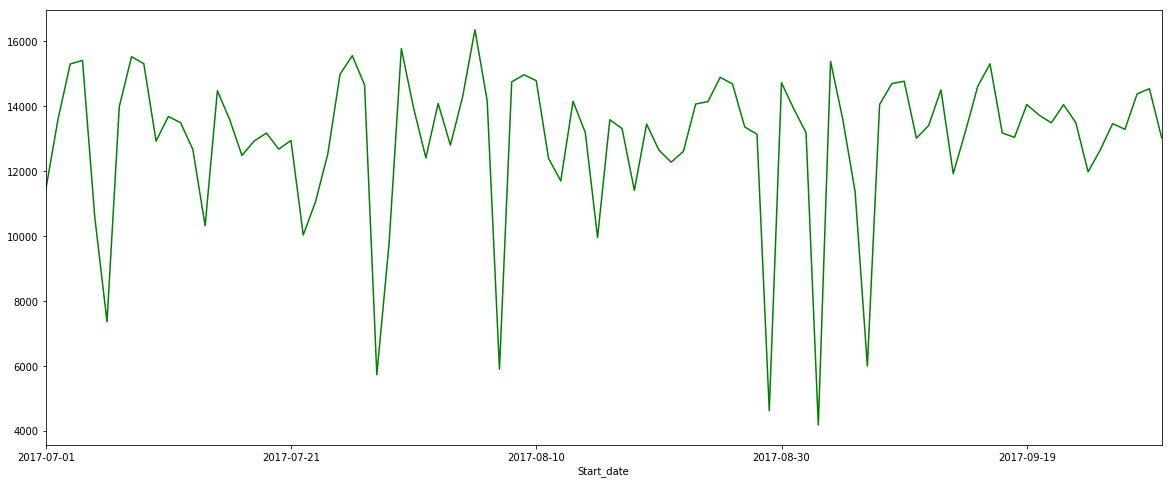

In [34]:
rides_by_dates = df_q3.groupby(['Start_date']).size().reset_index(name='count')
rides_by_dates.index = rides_by_dates.Start_date
plt.figure(figsize=(20,8))
rides_by_dates['count'].plot(color = 'green')

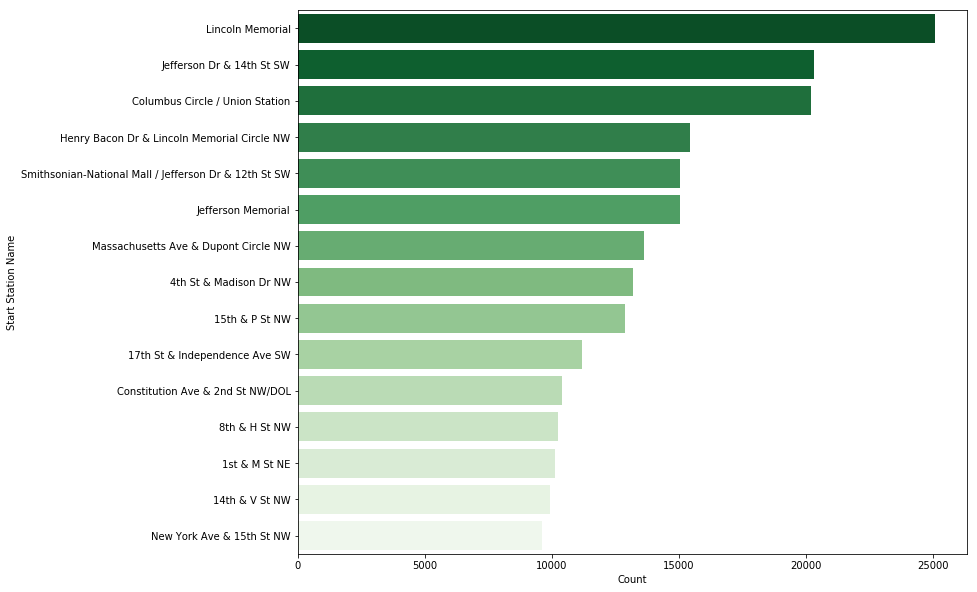

In [35]:
rides_by_start_station = df_q3['Start station'].value_counts()
df_data = {'Start Station Name': rides_by_start_station.index, 'Count': rides_by_start_station.values}
df_ridesbystart_station = pd.DataFrame(df_data).head(15)

plt.figure(figsize=(12,10))
sns.barplot(y = df_ridesbystart_station['Start Station Name'], x = df_ridesbystart_station['Count'], palette='Greens_r')

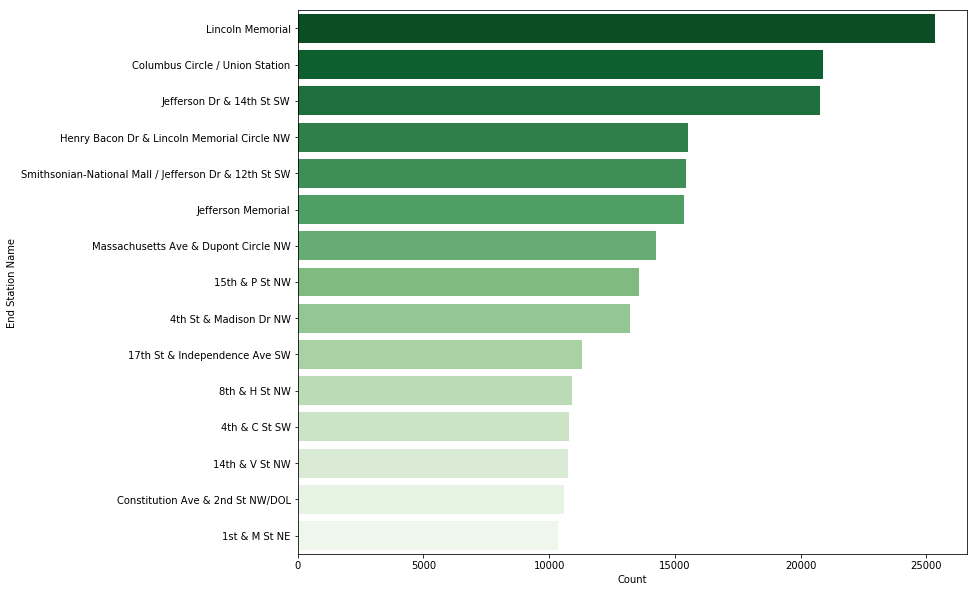

In [36]:
rides_by_end_station = df_q3['End station'].value_counts()
df_data = {'End Station Name': rides_by_end_station.index, 'Count': rides_by_end_station.values}
df_ridesbyend_station = pd.DataFrame(df_data).head(15)

plt.figure(figsize=(12,10))
sns.barplot(y = df_ridesbyend_station['End Station Name'], x = df_ridesbyend_station['Count'], palette='Greens_r')

<h5> We can spot the difference between destinations in Quarter 2 and 3 </h5>

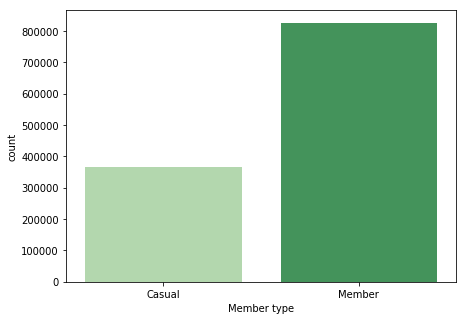

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_q3['Member type'], palette='Greens')

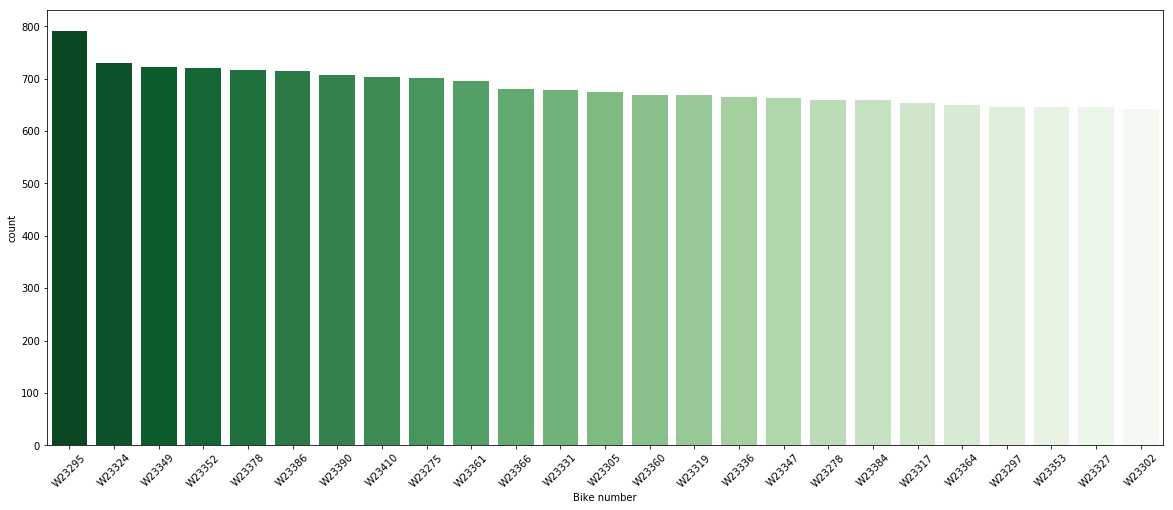

In [38]:
rides_by_bikes = df_q3.groupby(['Bike number']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_plot = rides_by_bikes.head(25)
plt.figure(figsize=(20, 8))
sns.barplot(x=df_plot['Bike number'], y=df_plot['count'], palette='Greens_r')
plt.xticks(rotation = 45)
plt.show()

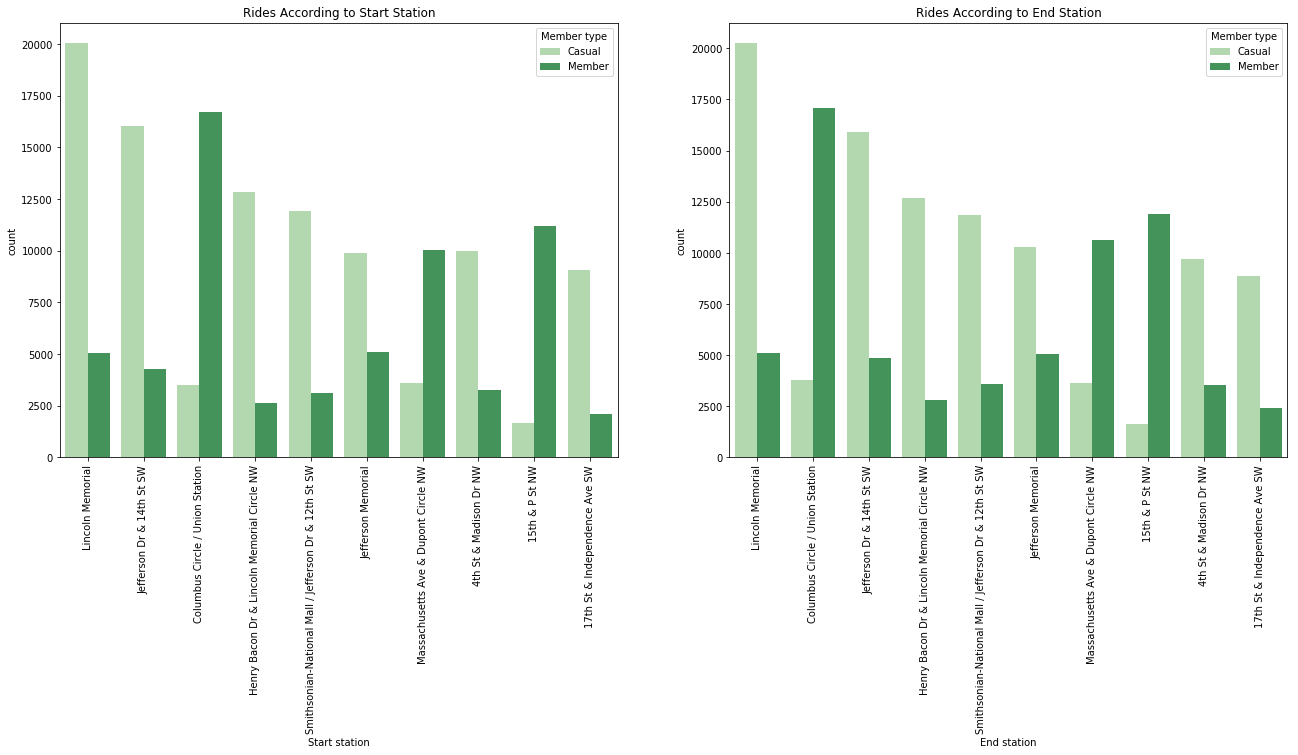

In [39]:
plt.figure(figsize=(22, 8))

plt.subplot(1,2,1)
sns.countplot(x=df_q3['Start station'], hue=df_q3['Member type'], palette='Greens', order=df_q3['Start station'].value_counts().iloc[:10].index)
plt.title('Rides According to Start Station')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x=df_q3['End station'], hue=df_q3['Member type'], palette='Greens', order=df_q3['End station'].value_counts().iloc[:10].index)
plt.title('Rides According to End Station')
plt.xticks(rotation = 90)

plt.show()

<h5> We can see that no. of Casual riders has increased as compared to the Quarter 2</h5>

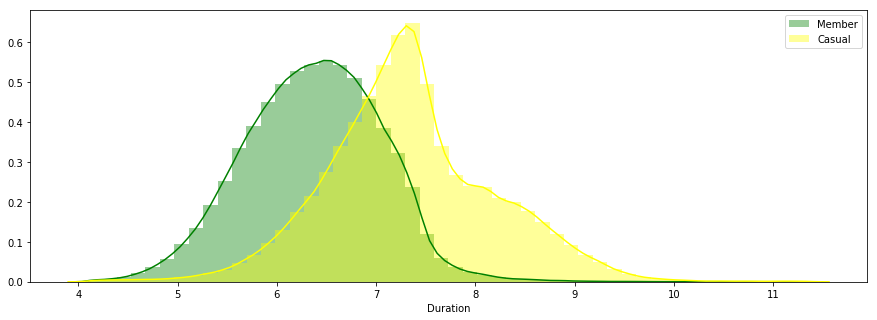

In [40]:
df1 = df_q3[df_q3['Member type'] == 'Member']
member_dur = df1['Duration'].apply(np.log)

df2 = df_q3[df_q3['Member type'] == 'Casual']
casual_dur = df2['Duration'].apply(np.log)

plt.figure(figsize=(15,5))
sns.distplot(a=member_dur, label='Member', color='green')
sns.distplot(a=casual_dur, label='Casual', color='yellow')
plt.legend()
plt.show()

<h1>Fourth Quarter Trips Analysis</h1>

In [41]:
df = df_q4.copy()

df['Start_date'] = df['Start date'].apply(lambda x: x.split(' ')[0])
df['End_date'] = df['End date'].apply(lambda x: x.split(' ')[0])

df1 = df[df['Start_date'] != df['End_date']]
print('So we can see that there are {} instances in which start date and end date are not same which is {} percent of total data.'.format(df1.shape[0],df1.shape[0]/df.shape[0]*100))

So we can see that there are 2438 instances in which start date and end date are not same which is 0.2990442359775484 percent of total data.


In [42]:
df_q4['Start_date'], df_q4['End_date'], df_q4['Start_time'], df_q4['End_time'] = preprocess_dates(df_q4)

100%|███████████████████████████████████████████████████████████████████████| 815264/815264 [00:24<00:00, 32658.86it/s]


In [43]:
df_q4 = df_q4.drop(['Start date', 'End date'],axis=1)

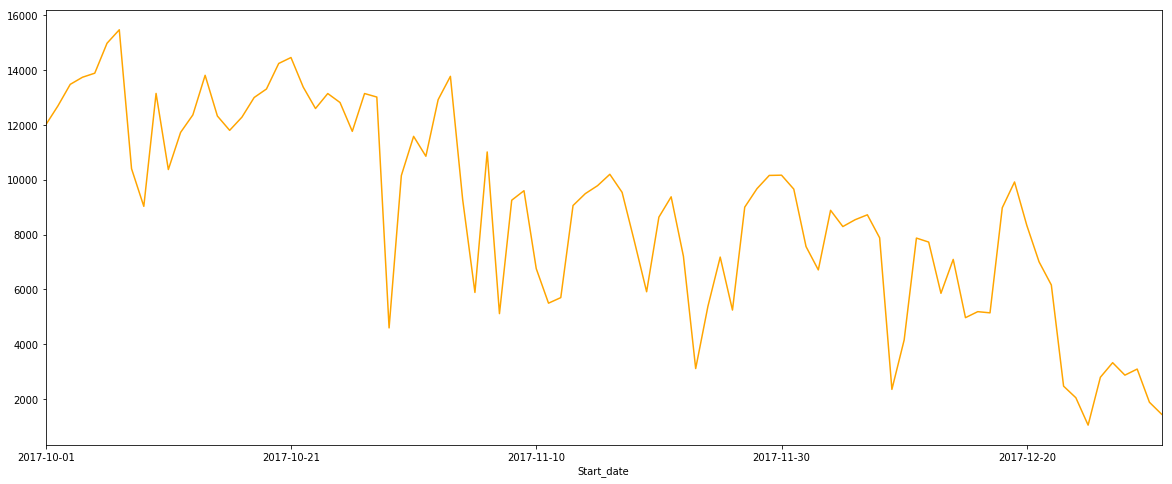

In [44]:
rides_by_dates = df_q4.groupby(['Start_date']).size().reset_index(name='count')
rides_by_dates.index = rides_by_dates.Start_date
plt.figure(figsize=(20,8))
rides_by_dates['count'].plot(color = 'orange')

<h5> We can see that no. of rides has significantly declined at the end of the year 2017</h5>

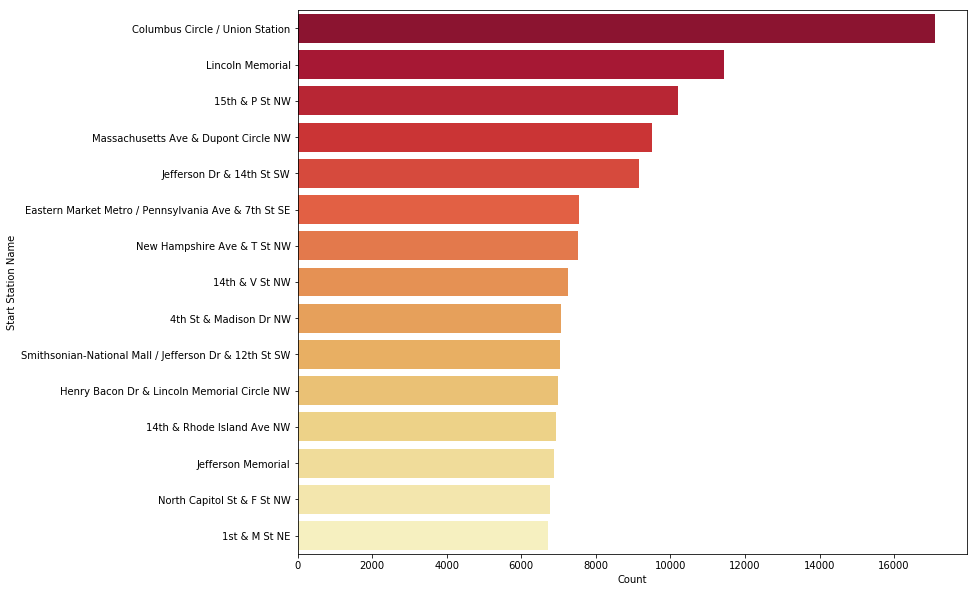

In [45]:
rides_by_start_station = df_q4['Start station'].value_counts()
df_data = {'Start Station Name': rides_by_start_station.index, 'Count': rides_by_start_station.values}
df_ridesbystart_station = pd.DataFrame(df_data).head(15)

plt.figure(figsize=(12,10))
sns.barplot(y = df_ridesbystart_station['Start Station Name'], x = df_ridesbystart_station['Count'], palette='YlOrRd_r')

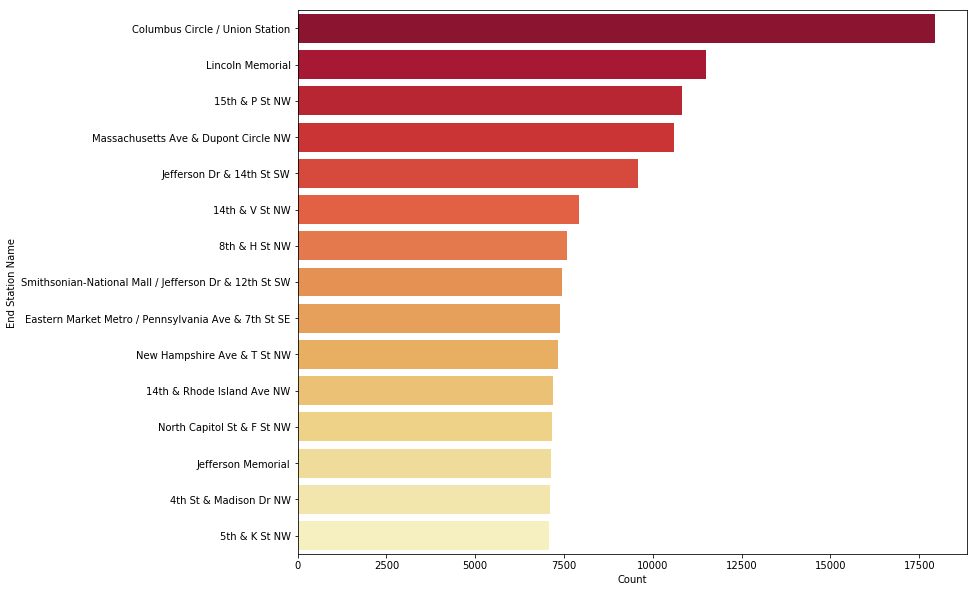

In [46]:
rides_by_end_station = df_q4['End station'].value_counts()
df_data = {'End Station Name': rides_by_end_station.index, 'Count': rides_by_end_station.values}
df_ridesbyend_station = pd.DataFrame(df_data).head(15)

plt.figure(figsize=(12,10))
sns.barplot(y = df_ridesbyend_station['End Station Name'], x = df_ridesbyend_station['Count'], palette='YlOrRd_r')

<h5> We can spot the significant change from the Quarter 3 in origin and destinations </h5>

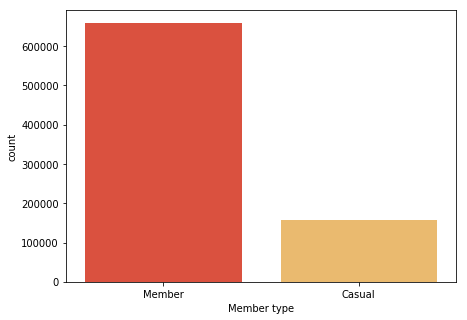

In [47]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_q4['Member type'], palette='YlOrRd_r')

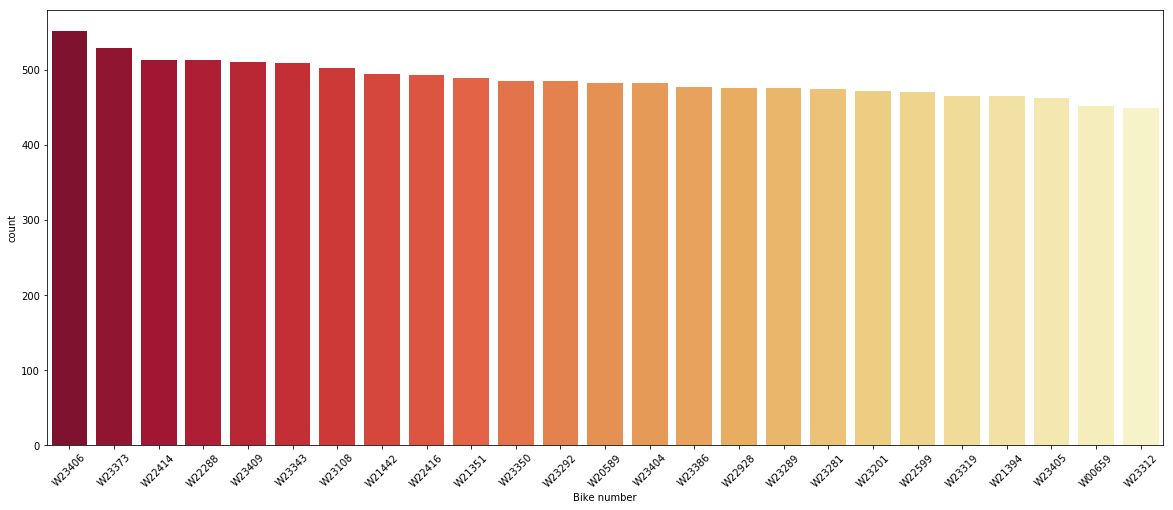

In [48]:
rides_by_bikes = df_q4.groupby(['Bike number']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_plot = rides_by_bikes.head(25)
plt.figure(figsize=(20, 8))
sns.barplot(x=df_plot['Bike number'], y=df_plot['count'], palette='YlOrRd_r')
plt.xticks(rotation = 45)
plt.show()

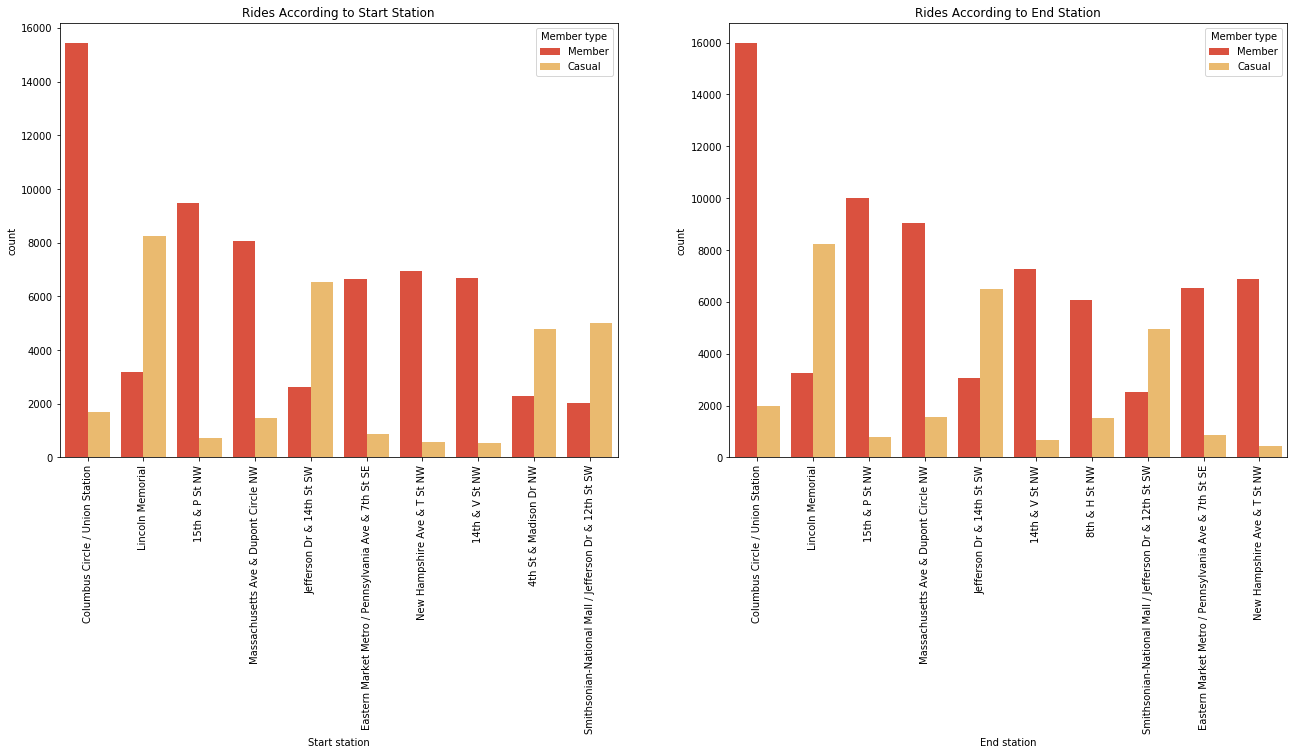

In [49]:
plt.figure(figsize=(22, 8))

plt.subplot(1,2,1)
sns.countplot(x=df_q4['Start station'], hue=df_q4['Member type'], palette='YlOrRd_r', order=df_q4['Start station'].value_counts().iloc[:10].index)
plt.title('Rides According to Start Station')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x=df_q4['End station'], hue=df_q4['Member type'], palette='YlOrRd_r', order=df_q4['End station'].value_counts().iloc[:10].index)
plt.title('Rides According to End Station')
plt.xticks(rotation = 90)

plt.show()

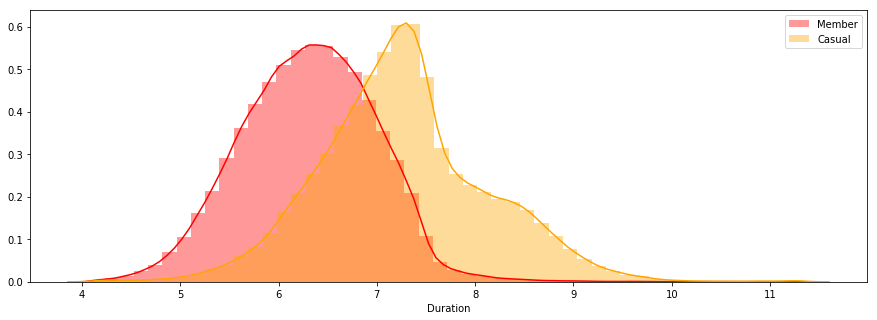

In [50]:
df1 = df_q4[df_q4['Member type'] == 'Member']
member_dur = df1['Duration'].apply(np.log)

df2 = df_q4[df_q4['Member type'] == 'Casual']
casual_dur = df2['Duration'].apply(np.log)

plt.figure(figsize=(15,5))
sns.distplot(a=member_dur, label='Member', color='Red')
sns.distplot(a=casual_dur, label='Casual', color='orange')
plt.legend()
plt.show()

<h2> Let's Join all dataframe so that we can get an overall picture </h2>

In [124]:
df_q1['quarter'] = 'q1'
df_q2['quarter'] = 'q2'
df_q3['quarter'] = 'q3'
df_q4['quarter'] = 'q4'

In [125]:
df_year = pd.concat([df_q1, df_q2, df_q3, df_q4])

In [126]:
df_year.shape

(3757777, 12)

In [127]:
df_year.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_date,End_date,Start_time,End_time,quarter
0,221,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,2017-01-01,2017-01-01,00:00:41,00:04:23,q1
1,1676,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,2017-01-01,2017-01-01,00:06:53,00:34:49,q1
2,1356,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,2017-01-01,2017-01-01,00:07:10,00:29:47,q1
3,1327,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,2017-01-01,2017-01-01,00:07:22,00:29:30,q1
4,1636,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,2017-01-01,2017-01-01,00:07:36,00:34:52,q1


In [128]:
df_year.tail()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_date,End_date,Start_time,End_time,quarter
815259,277,31109,7th & T St NW,31118,3rd & Elm St NW,W21036,Member,2017-12-31,2017-12-31,23:43:17,23:47:54,q4
815260,399,31125,15th & W St NW,31110,20th St & Florida Ave NW,W23147,Casual,2017-12-31,2017-12-31,23:51:55,23:58:35,q4
815261,393,31209,1st & N St SE,31609,Maine Ave & 7th St SW,W20144,Member,2017-12-31,2018-01-01,23:55:19,00:01:52,q4
815262,1319,31102,11th & Kenyon St NW,31102,11th & Kenyon St NW,W20860,Member,2017-12-31,2018-01-01,23:57:42,00:19:42,q4
815263,266,31229,New Hampshire Ave & T St NW,31119,14th & Belmont St NW,W01459,Member,2017-12-31,2018-01-01,23:58:21,00:02:48,q4


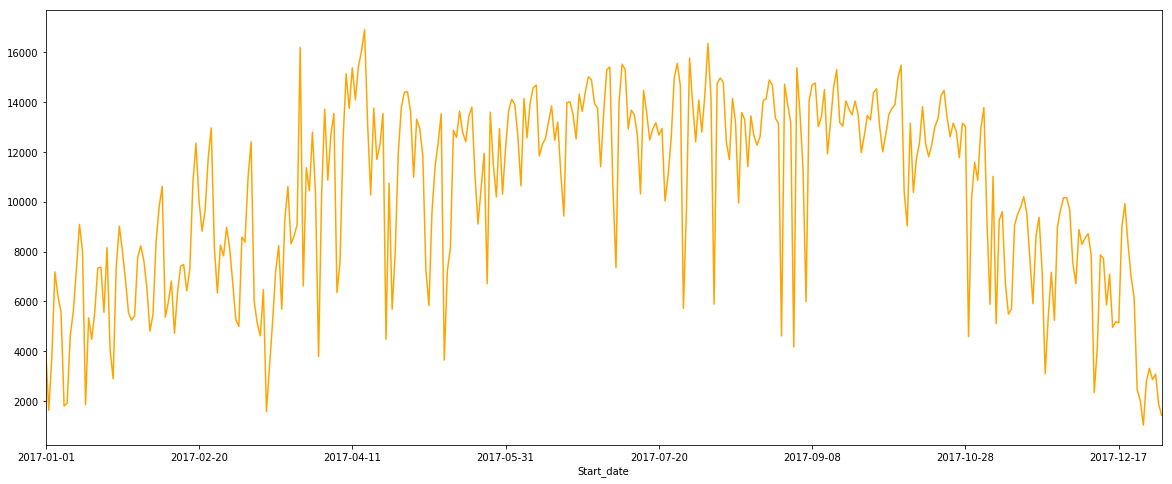

In [129]:
rides_by_dates_year = df_year.groupby(['Start_date']).size().reset_index(name='count')
rides_by_dates_year.index = rides_by_dates_year.Start_date
plt.figure(figsize=(20,8))
rides_by_dates_year['count'].plot(color='orange')

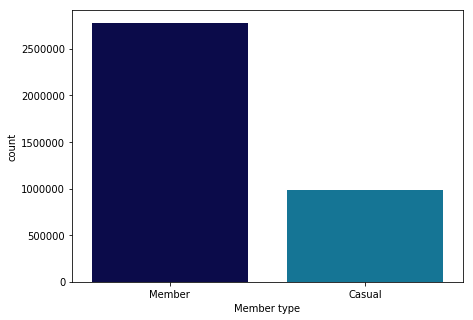

In [130]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_year['Member type'], palette='ocean')

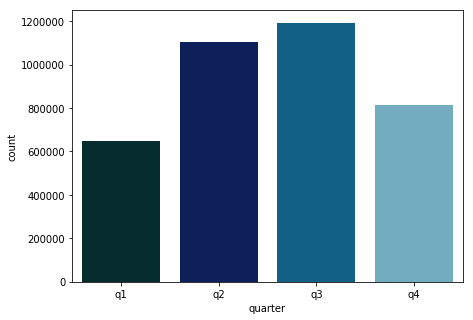

In [131]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_year['quarter'], palette='ocean')

In [132]:
df_year['Duration'].describe()

count    3.757777e+06
mean     1.153367e+03
std      2.121272e+03
min      6.000000e+01
25%      4.100000e+02
50%      7.100000e+02
75%      1.226000e+03
max      8.639400e+04
Name: Duration, dtype: float64

<h1> Now it's time to make some predictions </h1>

<h3> We will use 'Member' column as our target and rest as the features </h3>

In [133]:
df_year = df_year.drop('quarter', axis=1)

In [134]:
df_year.isnull().sum()

Duration                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
Start_date              0
End_date                0
Start_time              0
End_time                0
dtype: int64

In [135]:
df_year['Start Date'] = df_year['Start_date']+' '+df_year['Start_time']

In [136]:
df_year['End Date'] = df_year['End_date']+' '+df_year['End_time']

In [137]:
timestamp_start = []
timestamp_end = []

for i in tqdm(range(df_year.shape[0])):
    t = df_year['Start Date'].iloc[i]
    timestamp_start.append(time.mktime(datetime.datetime.strptime(t, "%Y-%m-%d %H:%M:%S").timetuple()))

for i in tqdm(range(df_year.shape[0])):
    t = df_year['End Date'].iloc[i]
    timestamp_end.append(time.mktime(datetime.datetime.strptime(t, "%Y-%m-%d %H:%M:%S").timetuple()))
    
df_year['Start Timestamp'] = timestamp_start
df_year['End Timestamp'] = timestamp_end

100%|█████████████████████████████████████████████████████████████████████| 3757777/3757777 [03:16<00:00, 19090.78it/s]


In [138]:
df_year = df_year.drop(['Start_date', 'End_date', 'Start_time', 'End_time', 'Start Date', 'End Date'], axis=1)

In [66]:
df_year = df_year.drop(['Start station', 'End station'], axis=1)

In [69]:
df_year.dtypes

Duration                  int64
Start station number      int64
End station number        int64
Bike number              object
Member type              object
Start Timestamp         float64
End Timestamp           float64
dtype: object

In [89]:
index_to_drop = []
for i in tqdm(range(df_year.shape[0])):
    ar = df_year['Bike number'].iloc[i]
    if(ar.startswith('W') or ar.startswith('w')):
        continue
    else:
        index_to_drop.append(i)

100%|█████████████████████████████████████████████████████████████████████| 3757777/3757777 [01:08<00:00, 54989.92it/s]


In [92]:
df_year = df_year.drop(df_year.index[index_to_drop])

In [95]:
preprocessed_bike_numbers = []
for i in tqdm(range(df_year.shape[0])):
    ar = df_year['Bike number'].iloc[i]
    preprocessed_bike_numbers.append(int(ar[1:]))

df_year['Bike number'] = preprocessed_bike_numbers

100%|█████████████████████████████████████████████████████████████████████| 3757649/3757649 [01:16<00:00, 49282.10it/s]


In [96]:
df_year['Member type'].unique()

array(['Member', 'Casual'], dtype=object)

In [97]:
dict_label = {'Member': 0, 'Casual': 1}

df_year['Member type'] = df_year['Member type'].map(dict_label)

In [98]:
df_year['Member type'].unique()

array([0, 1], dtype=int64)

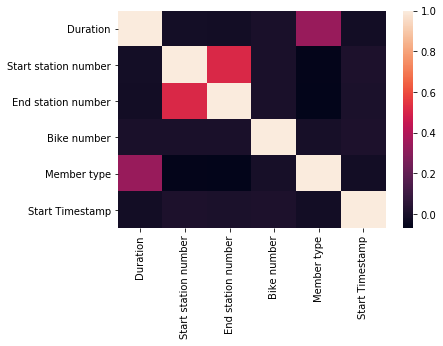

In [101]:
sns.heatmap(df_year.corr())

In [100]:
df_year = df_year.drop('End Timestamp', axis=1)

In [102]:
X = df_year.drop('Member type', axis=1)
y = df_year['Member type']

In [103]:
from sklearn.model_selection import train_test_split

xtr, xtest, ytr, ytest = train_test_split(X, y, random_state = 42)

In [104]:
xtr.shape

(2818236, 5)

In [105]:
pd.Series(ytr).value_counts()

0    2082247
1     735989
Name: Member type, dtype: int64

In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

def metrices(actual, predicted):
    print('Precision Score : ', precision_score(actual, predicted))
    print('Recall Score : ', recall_score(actual, predicted))
    print('F1 Score : ', f1_score(actual, predicted))
    print('Confusion Matrix : ', confusion_matrix(actual, predicted))
    print('Classification Report : ', classification_report(actual, predicted))

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, max_depth=8, n_estimators=100)

rf.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [117]:
metrices(ytr, dt.predict(xtr))

Precision Score :  0.8204993304840046
Recall Score :  0.6335787627260734
F1 Score :  0.715024802385936
Confusion Matrix :  [[1980233  102014]
 [ 269682  466307]]
Classification Report :                precision    recall  f1-score   support

           0       0.88      0.95      0.91   2082247
           1       0.82      0.63      0.72    735989

    accuracy                           0.87   2818236
   macro avg       0.85      0.79      0.81   2818236
weighted avg       0.86      0.87      0.86   2818236



In [118]:
metrices(ytest, dt.predict(xtest))

Precision Score :  0.7969910182789592
Recall Score :  0.6166173700420275
F1 Score :  0.6952965328990377
Confusion Matrix :  [[655017  38605]
 [ 94232 151559]]
Classification Report :                precision    recall  f1-score   support

           0       0.87      0.94      0.91    693622
           1       0.80      0.62      0.70    245791

    accuracy                           0.86    939413
   macro avg       0.84      0.78      0.80    939413
weighted avg       0.85      0.86      0.85    939413



In [120]:
feature_dict = {'Features': X.columns, 'Importance': rf.feature_importances_}

In [121]:
feature_imp = pd.DataFrame(feature_dict).sort_values(by=['Importance'], ascending=False)

In [122]:
feature_imp

,Features,Importance
0,Duration,0.743928
2,End station number,0.117843
1,Start station number,0.116291
4,Start Timestamp,0.021794
3,Bike number,0.000144


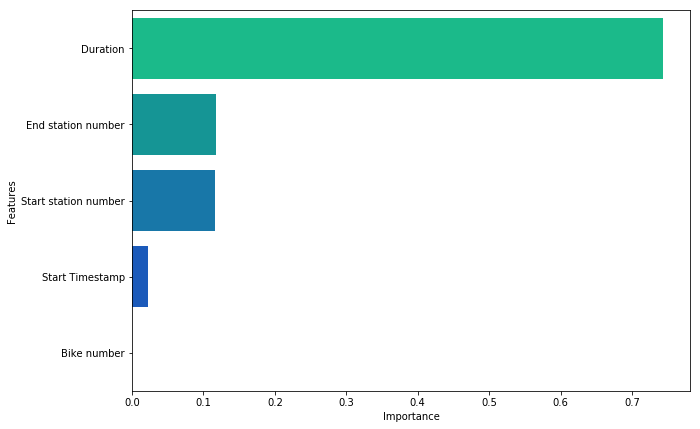

In [123]:
plt.figure(figsize=(10,7))
sns.barplot(y=feature_imp['Features'], x=feature_imp['Importance'], palette='winter_r')